# Assignment: More Matplotlib

The goal here is to replicate the figures you see as closely as possible.

In order to get some data, you will have to run the code in the cells below. **Don't worry about how this code works.** In the end, it will give you some numpy arrays, which you will use in your plots. You are not allowed to use any packages other than numpy and matplotlib to complete your assignment.

### Problem 1: Line plots

In this problem, we will plot some daily weather data from a NOAA station in [Millbrook, NY](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1NYDT0008/detail). A full description of this dataset is available at: <https://www.ncdc.noaa.gov/data-access/land-based-station-data>

The cell below uses pandas to download the data and populate a bunch of numpy arrays (`t_daily_min`, `t_daily_max`, etc.) Run the cell and then use the numpy arrays to try to re-create the plot you see.

In [1]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_380/474508320.py:28: SyntaxWarning: invalid escape sequence '\s'
  names=headers, header=None, sep='\s+',


In [2]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


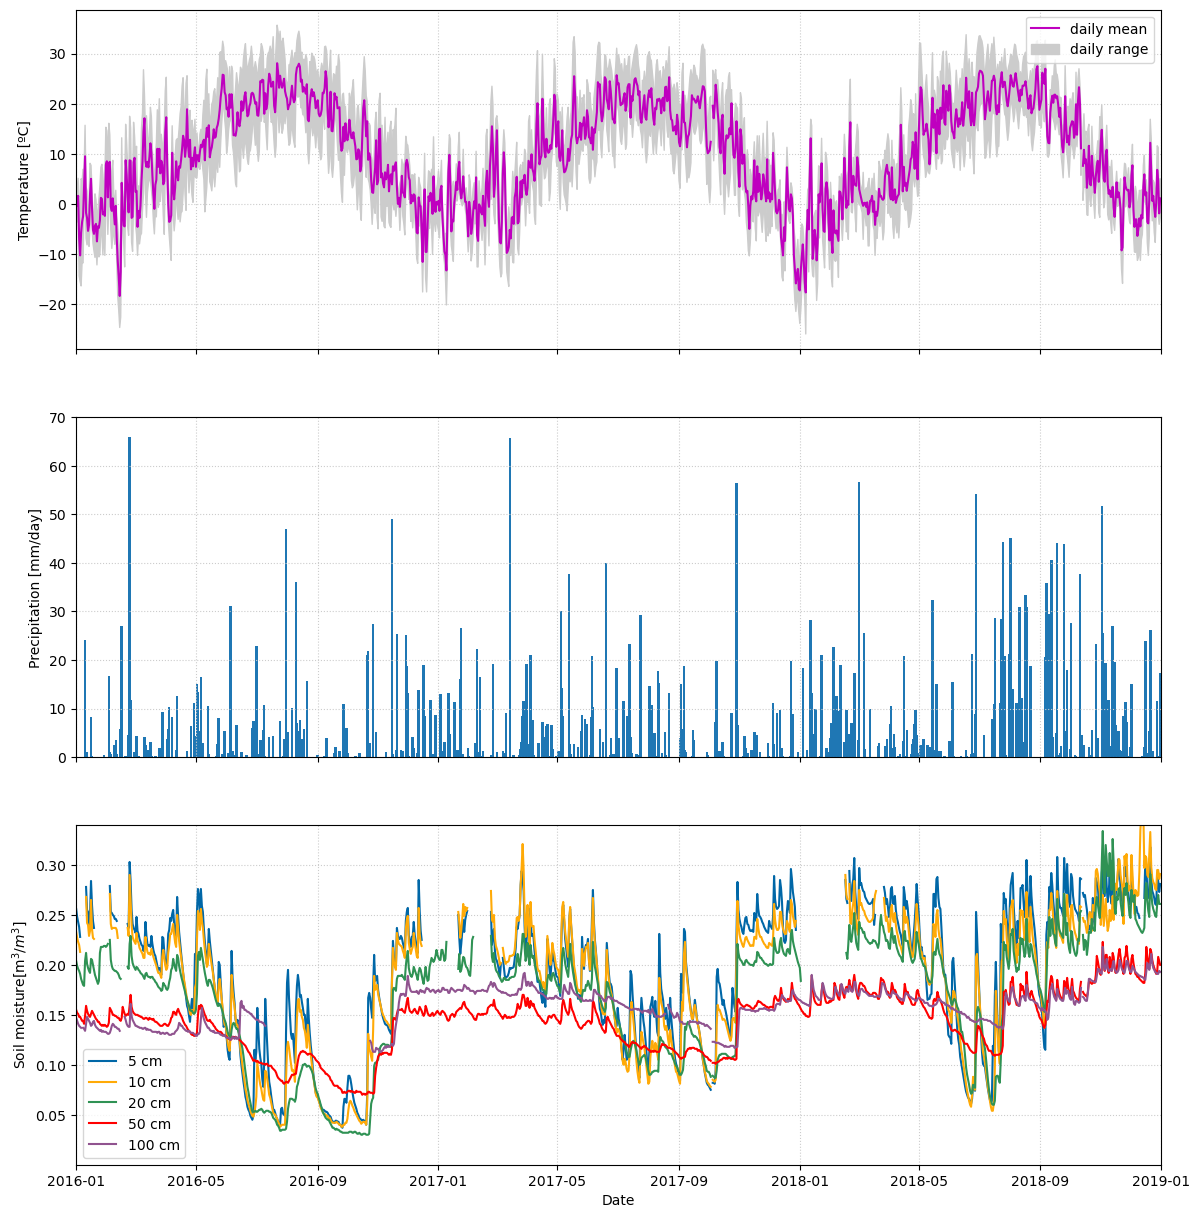

In [60]:
import numpy as np
import matplotlib.pyplot as plt 
import datetime

fig, axs = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

axs[0].plot(date, t_daily_mean, color='m', label= 'daily mean')
axs[0].fill_between(date,t_daily_min,t_daily_max,color='0.8', label = 'daily range')
#axs[0].legend(loc='upper right', fontsize='x-small')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('Temperature [ºC]')
axs[0].grid(True, c = '0.8', linestyle = ':')

axs[1].bar(date, p_daily_calc, width=2.5)
axs[1].set_ylabel("Precipitation [mm/day]")
axs[1].set_ylim([0,70])
axs[1].grid(True, c='0.8', linestyle = ':')

axs[2].plot(date, soil_moisture_5, color = '#0067a7', label = '5 cm')
axs[2].plot(date, soil_moisture_10, color = '#ffaa07', label = '10 cm')
axs[2].plot(date, soil_moisture_20, color = '#2f9254', label = '20 cm')
axs[2].plot(date, soil_moisture_50, color = 'red', label = '50 cm')
axs[2].plot(date, soil_moisture_100, color = '#90538f', label = '100 cm')
axs[2].set_ylabel(r'Soil moisture[m$^3/m^3$]')
axs[2].set_xlabel('Date')
axs[2].legend(loc='lower left')
axs[2].set_xlim([datetime.date(2016, 1, 1), datetime.date(2019, 1, 1)])
current_yticks = axs[2].get_yticks()
new_yticks = [tick for tick in current_yticks if tick != 0.00]
axs[2].set_yticks(new_yticks)
axs[2].set_ylim([0,0.34])
axs[2].grid(True, c='0.8', linestyle=':')

![figure](images/assignment4_fig1.png)

### Problem 2: Contour Plots

Now we will visualize some global temperature data from the NCEP-NCAR atmospheric reanalysis.

In [61]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

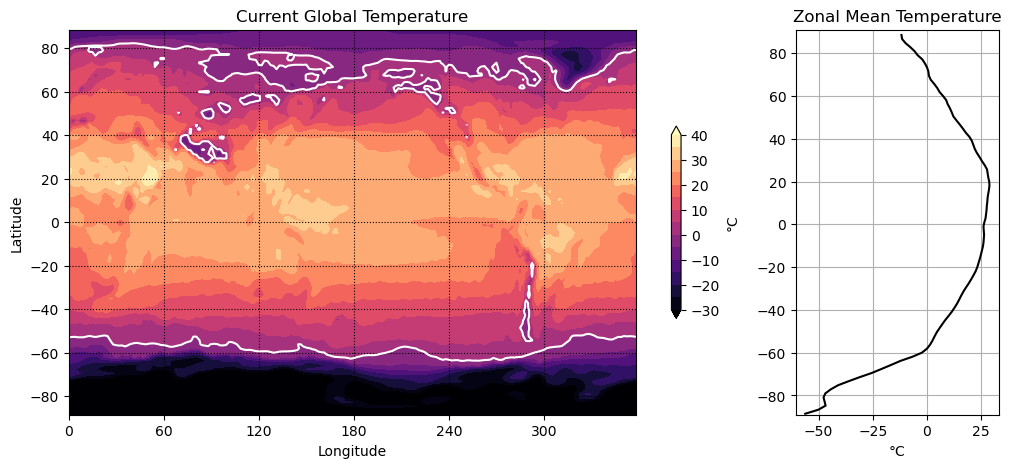

In [166]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature

#  Suppress warnings issued by Cartopy when downloading data files
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(figsize=(12, 5), ncols=2, width_ratios=[7, 2])
#fig, axes = plt.subplots(figsize=(11, 5), ncols=2, width_ratios=[3,1])
ax0, ax1 = axes
ax0.set_title("Current Global Temperature")
contour1 = ax0.contourf(lon, lat, temp, levels = np.arange(-30, 41, 5), extend = "both", cmap='magma', vmin=-30, vmax=40)
cbar = fig.colorbar(contour1, ax=ax0, shrink=0.5)
cbar.set_label('°C')  # Add this line to set the label
ax0.set_xticks(np.arange(min(lon), max(lon)+1, 60))  # Adjust min and max as needed

ax0.grid(True, color = 'black', linestyle = ':')
ax0.set_ylabel("Latitude")
ax0.set_xlabel("Longitude")
ax0.contour(lon, lat, temp, [0], colors = 'white')

mean_temp = np.mean(temp, axis=1)
ax1.plot(mean_temp, lat, color='black')
ax1.set_xlabel("°C")
ax1.set_title("Zonal Mean Temperature")
ax1.set_ylim(-89, 91)
ax1.grid(True)
plt.subplots_adjust(wspace=0.04)  # Adjust spacing between plot on the left and plot on the right
plt.show()

![figure](images/assignment4_fig2.png)

### Problem 3: Scatter plots
Here we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by log10(depth) and adjust the marker size to be magntiude$^4$/100

In [149]:
import numpy as np

fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

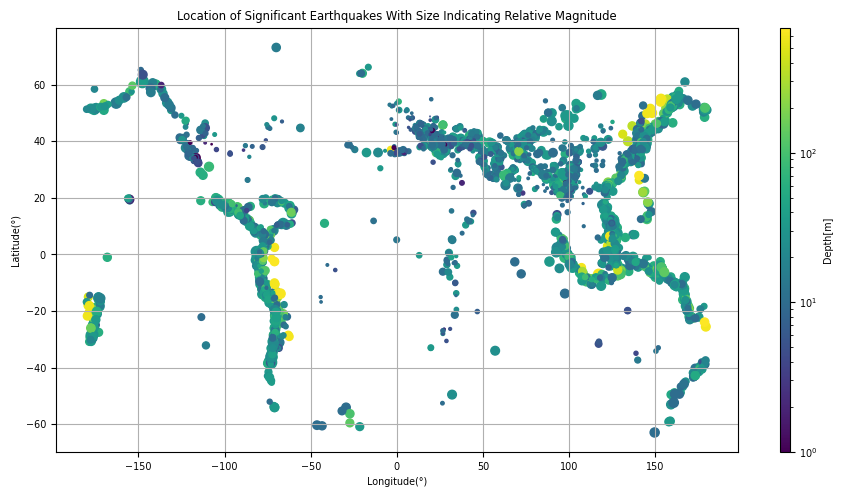

In [150]:
import warnings
import cartopy
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature
import matplotlib.colors
from matplotlib.colors import LogNorm

#  Suppress warnings issued by Cartopy when downloading data files
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(11, 5.5))

plt.title("Location of Significant Earthquakes With Size Indicating Relative Magnitude", fontsize='small')


magnitude_new = (magnitude**4)/100
plt.scatter(longitude, latitude, c = depth, s = magnitude_new, norm=LogNorm())

# Set smaller font size for tick labels
plt.tick_params(axis='both', labelsize='x-small')

plt.xlabel('Longitude(°)', fontsize='x-small')
plt.ylabel('Latitude(°)', fontsize='x-small')
plt.grid(True)

cbar = plt.colorbar(aspect=45)
cbar.ax.tick_params(labelsize='x-small')
cbar.set_label('Depth[m]', rotation=90, fontsize='x-small')

![figure](images/assignment4_fig3.png)